<a href="https://colab.research.google.com/github/rss9311/saboo-ritika-final-project/blob/main/rss9311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import auth
auth.authenticate_user()
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [5]:
# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'rss9311'
sample_count = 2000

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Customers`
''', project_id=project_id).total[0]

customers = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Customers`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(customers))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Geolocation`
''', project_id=project_id).total[0]

geo = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Geolocation`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(geo))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Order_Items`
''', project_id=project_id).total[0]

order_items = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Order_Items`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(order_items))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Order_Payments`
''', project_id=project_id).total[0]

order_payments = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Order_Payments`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(order_payments))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Orders`
''', project_id=project_id).total[0]

orders = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Orders`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(orders))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Product_Category_Translation`
''', project_id=project_id).total[0]

prod_translation = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Product_Category_Translation`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(prod_translation))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Products`
''', project_id=project_id).total[0]

products = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Products`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(products))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Sellers`
''', project_id=project_id).total[0]

sellers = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Sellers`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(sellers))

row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM `rss9311.ecommerce_dataset.Delivery_Snapshot`
''', project_id=project_id).total[0]

delivery_snapshot = pd.io.gbq.read_gbq(f'''
  SELECT
    *
  FROM
    `rss9311.ecommerce_dataset.Delivery_Snapshot`
''', project_id=project_id)

print(f'Full dataset has {row_count} rows')
print(len(delivery_snapshot))

Full dataset has 99441 rows
99441
Full dataset has 1000163 rows
1000163
Full dataset has 112650 rows
112650
Full dataset has 103886 rows
103886
Full dataset has 99441 rows
99441
Full dataset has 71 rows
71
Full dataset has 32951 rows
32951
Full dataset has 3095 rows
3095
Full dataset has 112650 rows
112650


In [157]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0735e7e4298a2ebbb46649346570476a,fcb003b1bdc0df64b4d065d9bb94f8c4,59650,acu,RN
1,903b3d86e3990db01619a4ebe3edef4e,46824822b15da44e983b021d0e945379,59650,acu,RN
2,38c97666e962d4fea7fd6a83e69f20cd,b6108acc674ae5c99e29adc1047d1049,59650,acu,RN
3,77c2f46cf580f4874c9a5751c2d88474,402cce5c0509000eed9e77fece8056e2,63430,ico,CE
4,4d3ef4cfffb8ad4767c199c36a4cfee6,6ba00666ab7eada5ceec279b259e44b5,63430,ico,CE


In [158]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,49010,-10.910515,-37.052401,aracaju,SE
1,49047,-10.926815,-37.071063,aracaju,SE
2,49030,-10.970165,-37.061644,aracaju,SE
3,49048,-10.940184,-37.070850,aracaju,SE
4,49050,-10.927157,-37.063079,aracaju,SE


In [159]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,a0ab96e461d74537772b84950f26a257,climatizacao,41,717,1,1050,18,7,8
1,4d7585daba2f8b3ed7f87447908b4237,telefonia_fixa,53,897,2,300,15,8,9
2,20ae7c024ede613f47e0d2f23f461493,telefonia_fixa,25,455,1,330,17,11,9
3,ad7aebed205805125489f8a89819b24b,construcao_ferramentas_ferramentas,41,2526,2,1150,22,10,9
4,16d096faa27582985f849f08370cf1ed,agro_industria_e_comercio,50,1153,1,4050,11,18,10


In [160]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,4be2e7f96b4fd749d52dff41f80e39dd,69900,rio branco,AC
1,327b89b872c14d1c0be7235ef4871685,69005,manaus,AM
2,4221a7df464f1fe2955934e30ff3a5a1,48602,bahia,BA
3,651530bf5c607240ccdd89a30c9c9712,44600,ipira,BA
4,2b402d5dc42554061f8ea98d1916f148,44900,irece,BA


In [161]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,f09e36e258656850b92657ac5f67b6d5,1,44d53f1240d6332232e4393c06500475,b64d51f0435e884e8de603b1655155ae,2018-07-09 13:31:36+00:00,3.0,12.79
1,f9ccaff7267fd0cf076e795b1fae8b69,1,44d53f1240d6332232e4393c06500475,b64d51f0435e884e8de603b1655155ae,2018-08-14 14:04:44+00:00,3.0,15.23
2,c79bdf061e22288609201ec60deb42fb,1,5304ff3fa35856a156e1170a6022d34d,cf6f6bc4df3999b9c6440f124fb2f687,2017-05-12 19:05:20+00:00,3.5,8.72
3,37193e64eb9a46b7f3197762f242b20a,1,98224bfc1eaadb3a394ec334c60453ff,ce616e1913288884e7742faac9d981db,2018-06-28 01:30:49+00:00,3.5,7.39
4,95d6357ffe41aa6d2998852a710c70a0,1,98224bfc1eaadb3a394ec334c60453ff,ce616e1913288884e7742faac9d981db,2018-06-12 19:15:14+00:00,3.5,18.23


In [162]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94
1,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
2,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
3,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
4,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00


In [163]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33+00:00,NaT,NaT,NaT,2017-12-12 00:00:00+00:00
1,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58+00:00,NaT,NaT,NaT,2018-01-08 00:00:00+00:00
2,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52+00:00,NaT,NaT,NaT,2018-01-11 00:00:00+00:00
3,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04+00:00,NaT,NaT,NaT,2018-03-07 00:00:00+00:00
4,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34+00:00,NaT,NaT,NaT,2017-12-01 00:00:00+00:00


In [6]:
delivery_snapshot.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,customer_state,customer_city,customer_zip_code_prefix,seller_state,seller_city,seller_zip_code_prefix,product_category_name,Product_Category_Translation,product_weight_g
0,7e4f454abfc163899a6ef5b4d5facfb2,e09646444511bcbf9141bf44ab8e8ab2,delivered,2017-12-15 06:52:25+00:00,2017-12-15 07:11:03+00:00,2017-12-15 19:45:04+00:00,2017-12-19 22:23:49+00:00,2018-01-15 00:00:00+00:00,67f36b3689147d882d2b298fd0715d80,003554e2dce176b5555353e4f3555ac8,120.00,RJ,rio de janeiro,22765,GO,goiania,74565,None,None,1200
1,e75bd2f9adb46257d65d9e916355326a,a5757008de590f9d9686fb610cd8f48c,delivered,2017-11-06 18:28:39+00:00,2017-11-07 03:31:08+00:00,2017-11-07 19:44:52+00:00,2017-11-24 23:38:45+00:00,2017-12-01 00:00:00+00:00,467ee8619a328138b578ace663efbced,004c9cd9d87a3c30c522c48c4fc07416,75.90,GO,anapolis,75114,SP,ibitinga,14940,None,None,900
2,dc3f947c4795561fca218d2ae362a4ef,8d1e0ca8d222c0b8f191595745c00b48,delivered,2017-11-13 11:36:48+00:00,2017-11-13 11:46:47+00:00,2017-11-14 16:18:48+00:00,2017-11-27 15:03:33+00:00,2017-12-08 00:00:00+00:00,541bc0bf3c3255ee2d44f3863336095e,004c9cd9d87a3c30c522c48c4fc07416,195.99,RJ,petropolis,25770,SP,ibitinga,14940,None,None,4200
3,b0aa6adc10b3bd14eae812d2f50cd2f1,73c2d0df55f8431aa5ec63d4e3b7bb63,delivered,2017-11-24 17:54:35+00:00,2017-11-26 17:55:28+00:00,2017-11-27 19:02:40+00:00,2017-12-28 12:19:09+00:00,2017-12-21 00:00:00+00:00,09d934535911e9af88dda1e31735379d,004c9cd9d87a3c30c522c48c4fc07416,195.20,MG,monte verde,37653,SP,ibitinga,14940,None,None,19200
4,38edd38dc17b36d7fd7554100453f1bd,44e09b2bffa224531befe9482a608f58,delivered,2018-02-16 10:35:05+00:00,2018-02-16 11:20:28+00:00,2018-02-16 22:55:56+00:00,2018-03-27 02:48:34+00:00,2018-03-15 00:00:00+00:00,8c7274c4e638e7f229007fe28aafc741,004c9cd9d87a3c30c522c48c4fc07416,179.80,RJ,iguaba grande,28960,SP,ibitinga,14940,None,None,1950


In [7]:
delivery_snapshot['approval_time'] = (delivery_snapshot['order_approved_at'] - delivery_snapshot['order_purchase_timestamp']) / np.timedelta64(1, 'D')
delivery_snapshot['to_carrier_time'] = (delivery_snapshot['order_delivered_carrier_date'] - delivery_snapshot['order_approved_at']) / np.timedelta64(1, 'D')
delivery_snapshot['to_customer_time'] = (delivery_snapshot['order_delivered_customer_date'] - delivery_snapshot['order_delivered_carrier_date']) / np.timedelta64(1, 'D')
delivery_snapshot['delivery_delay'] = (delivery_snapshot['order_delivered_customer_date'] - delivery_snapshot['order_purchase_timestamp']) / np.timedelta64(1, 'D')

In [ ]:
delivery_snapshot.dtypes

In [ ]:
delivery_snapshot.replace([np.inf, -np.inf], np.nan, inplace=True)
delivery_snapshot.dropna(subset=["delivery_delay"], how="all", inplace=True)
delivery_snapshot.dropna(subset=["approval_time"], how="all", inplace=True)
delivery_snapshot.dropna(subset=["to_carrier_time"], how="all", inplace=True)
delivery_snapshot.dropna(subset=["to_customer_time"], how="all", inplace=True)
delivery_snapshot.dropna(subset=["product_weight_g"], how="all", inplace=True)

delivery_snapshot = delivery_snapshot.astype({'delivery_delay': int, 'approval_time': int, 'to_carrier_time': int, 'to_customer_time': int, 'product_weight_g': int, 'price': int})

delivery_snapshot['same_city'] = np.where(delivery_snapshot['customer_city'] == delivery_snapshot['seller_city'], 1, 0)
delivery_snapshot['same_state'] = np.where(delivery_snapshot['customer_state'] == delivery_snapshot['seller_state'], 1, 0)
delivery_snapshot['same_zipcode_prefix'] = np.where(delivery_snapshot['customer_zip_code_prefix'] == delivery_snapshot['seller_zip_code_prefix'], 1, 0)
delivery_snapshot['delivery_out_from_carrier_day_of_week'] = delivery_snapshot['order_delivered_carrier_date'].dt.dayofweek

delivery_snapshot = delivery_snapshot.astype({'same_city': int, 'same_state': int, 'same_zipcode_prefix': int, 'delivery_out_from_carrier': int})
delivery_snapshot.head()

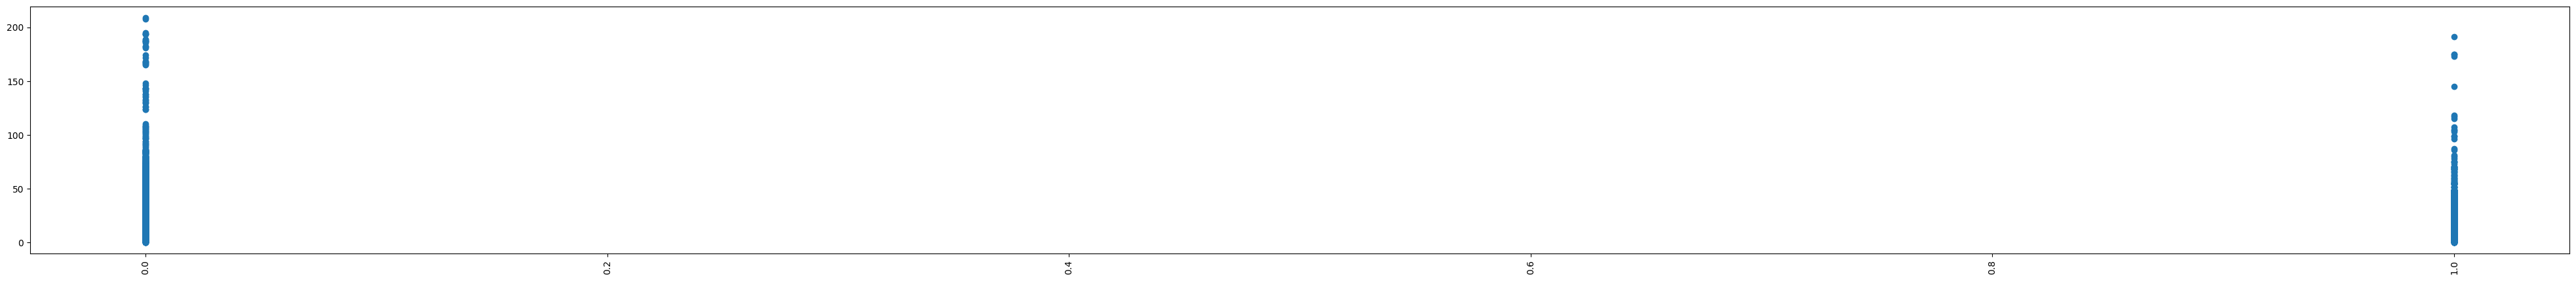

In [59]:
from matplotlib import pyplot as plt
#delivery_snapshot["Product_Category_Translation"].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
#plt.xticks(rotation=90)
#plt.rcParams['figure.figsize'] = [20, 5]
#plt.rcParams['figure.dpi'] = 100
#plt.show()

plt.scatter(delivery_snapshot['same_state'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

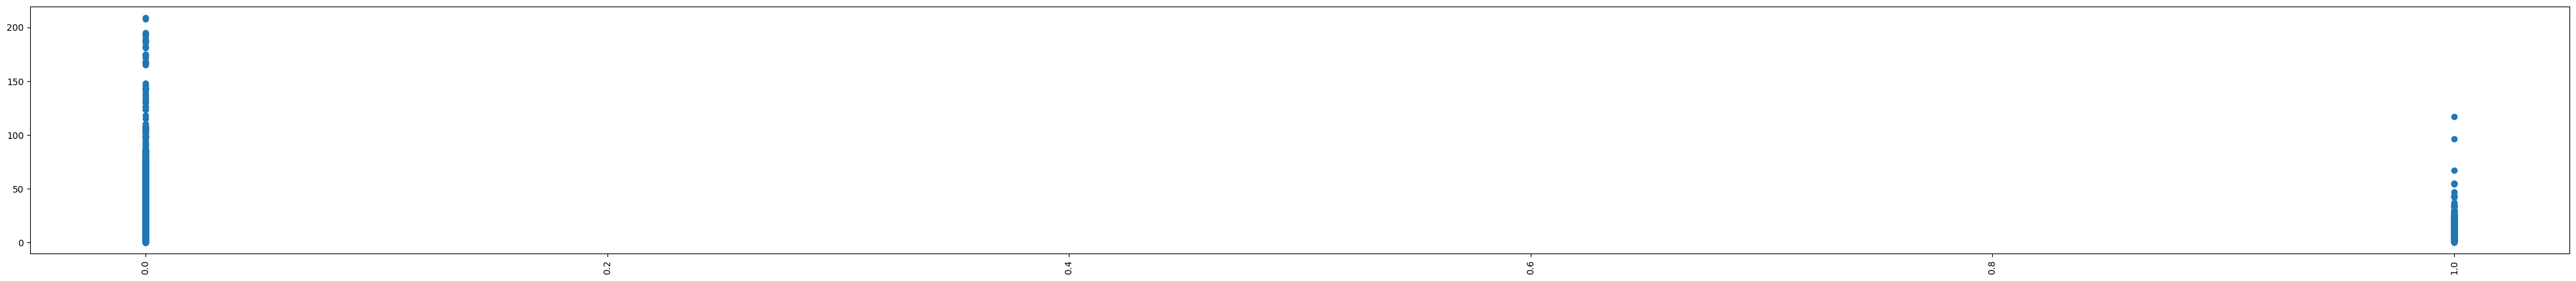

In [60]:
plt.scatter(delivery_snapshot['same_city'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

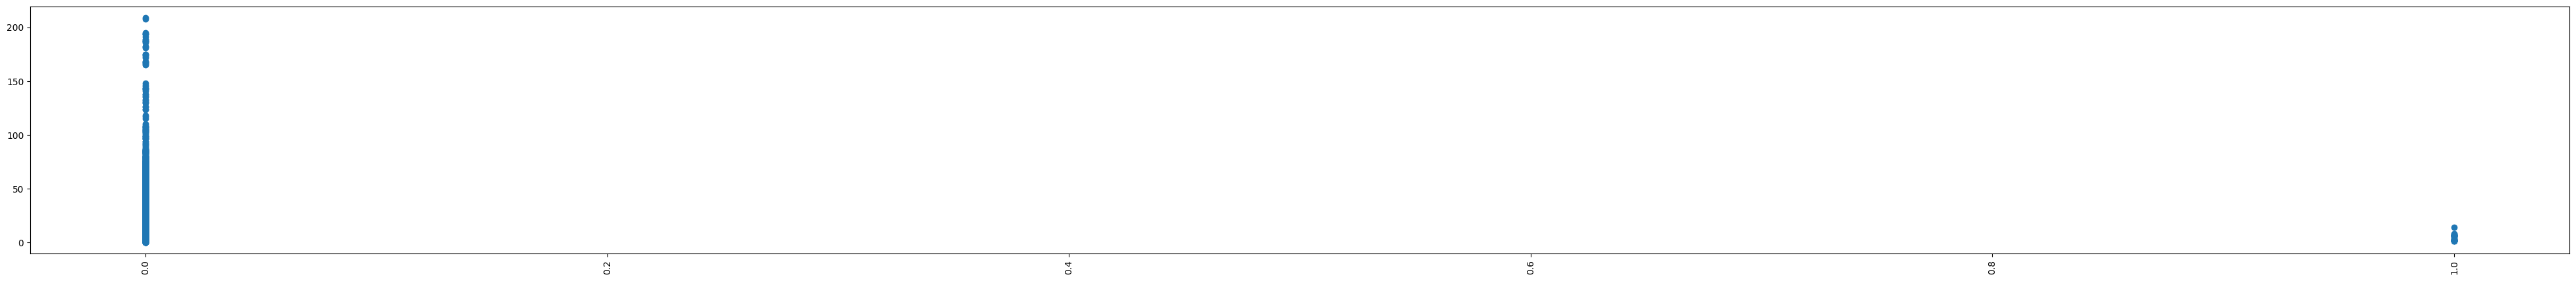

In [62]:
plt.scatter(delivery_snapshot['same_zipcode_prefix'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

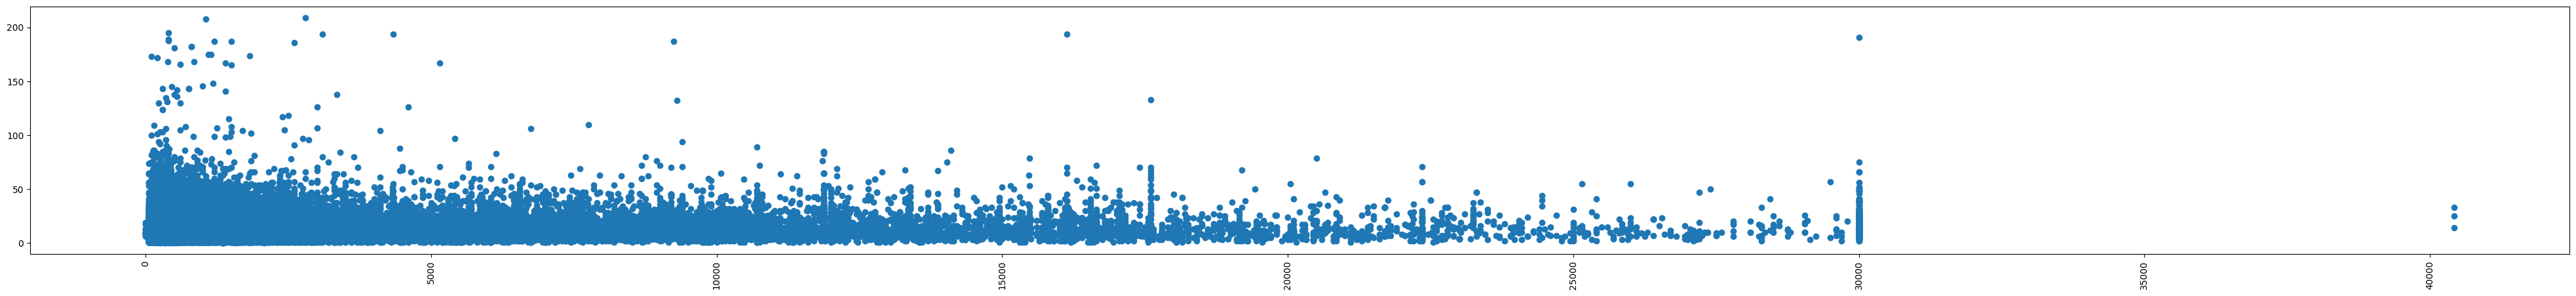

In [63]:
plt.scatter(delivery_snapshot['product_weight_g'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

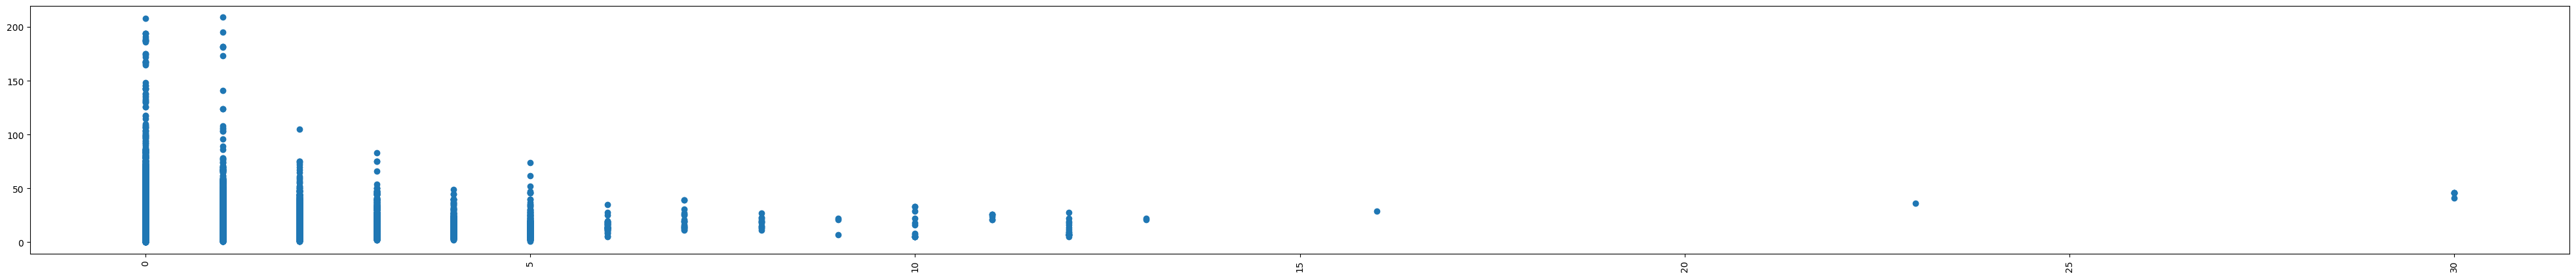

In [64]:
plt.scatter(delivery_snapshot['approval_time'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

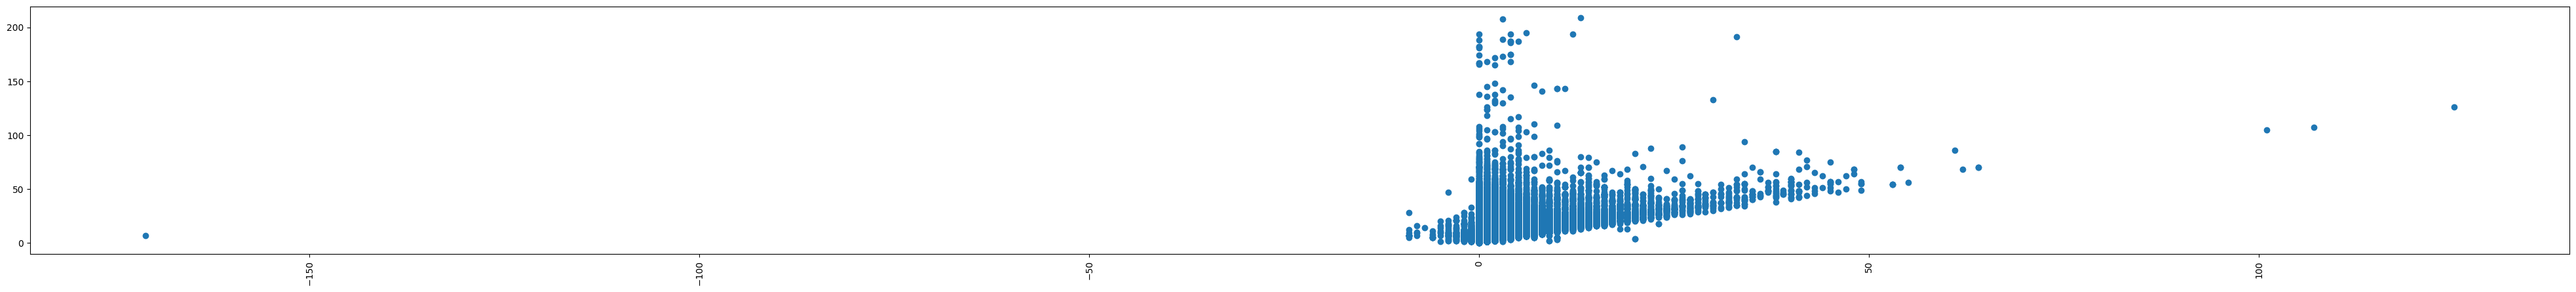

In [65]:
plt.scatter(delivery_snapshot['to_carrier_time'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

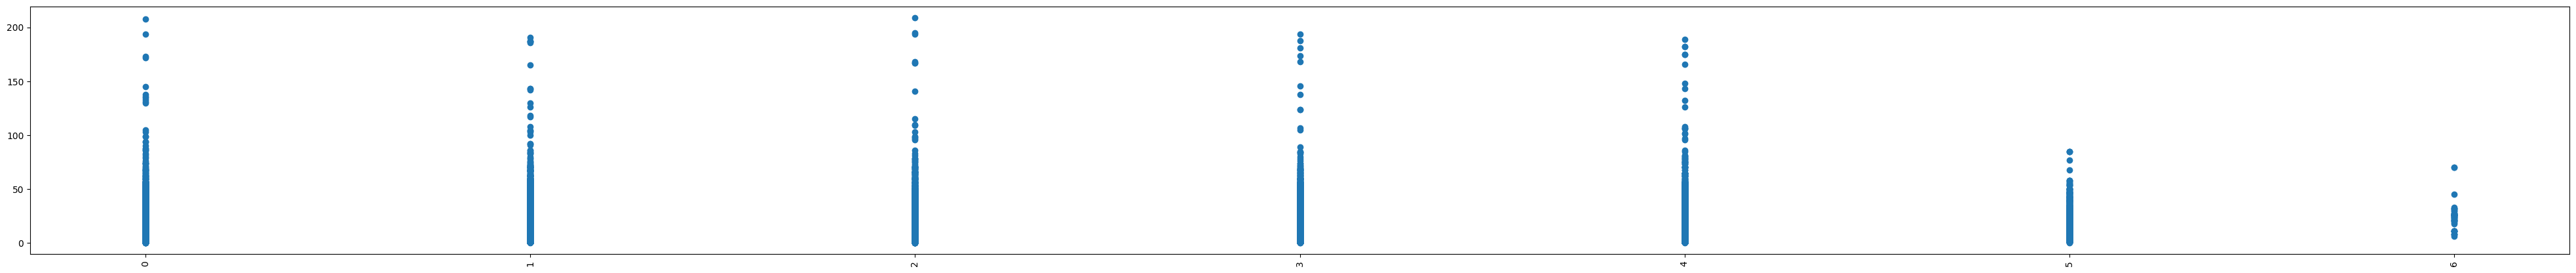

In [66]:
plt.scatter(delivery_snapshot['delivery_out_from_carrier_day_of_week'], delivery_snapshot['delivery_delay'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

In [71]:
delivery_snapshot.dtypes
# FEATURE SELECTION 

# FORWARD FEATURE SELECTION

features = delivery_snapshot[['approval_time', 'to_carrier_time', 'product_weight_g', 'same_city', 'same_state', 'delivery_out_from_carrier_day_of_week', 'same_zipcode_prefix']]
X = features
y = delivery_snapshot['delivery_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

from sklearn.metrics import r2_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_rmse_scores)

y_pred = forest.predict(X_test)

r2_score(y_test, y_pred)

Scores: [9.13400235 9.54742796 8.97755851 9.83940251 8.6744066  9.5479425
 9.72853549 9.81312175 8.96167054 9.40108056]
Mean: 9.36251487787241
Standard deviation: 0.38328600020340353


0.0073667475025874785

In [80]:
features = delivery_snapshot[['approval_time']]
X = features
y = delivery_snapshot['delivery_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.0073667475025874785

In [81]:
features = delivery_snapshot[['approval_time', 'to_carrier_time']]
X = features
y = delivery_snapshot['delivery_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.16678786540670776

In [85]:
features = delivery_snapshot[['approval_time', 'to_carrier_time', 'delivery_out_from_carrier_day_of_week']]
X = features
y = delivery_snapshot['delivery_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.16704517347227898

In [86]:
features = delivery_snapshot[['approval_time', 'to_carrier_time', 'delivery_out_from_carrier_day_of_week', 'same_city']]
X = features
y = delivery_snapshot['delivery_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.1911540080892582

In [93]:
features = delivery_snapshot[['approval_time', 'to_carrier_time', 'same_city', 'same_state']]
X = features
y = delivery_snapshot['delivery_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)

forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)

r2_score(y_test, y_pred)

0.2922579016295179

In [132]:
input_seller_state = 'GO' #@param ['GO', 'SP', 'PR', 'MG', 'RS', 'PB', 'RJ', 'ES', 'SC', 'DF', 'BA','PE', 'MT', 'CE', 'AM', 'RO', 'RN', 'PI', 'MS', 'MA', 'PA', 'SE']
input_customer_state = 'GO' #@param ['GO', 'SP', 'PR', 'MG', 'RS', 'PB', 'RJ', 'ES', 'SC', 'DF', 'BA','PE', 'MT', 'CE', 'AM', 'RO', 'RN', 'PI', 'MS', 'MA', 'PA', 'SE']

input_seller_city = 'goiania' #@param {type:"string"}
input_customer_city = 'ipatinga' #@param {type:"string"}

purchase_date = '2023-01-01' #@param {type:"date"}
approval_date = '2023-01-02'  #@param {type:"date"}
delivered_to_carrier_date = '2023-01-09'  #@param {type:"date"}

input_arrival_time = 1 #@param {type:"integer"}
input_to_carrier_time = 8  #@param {type:"integer"}


In [155]:
input_same_city = (input_seller_city == input_customer_city)
input_same_state = (input_seller_state == input_customer_state)

x_pred = [[input_arrival_time, input_to_carrier_time, input_same_city, input_same_state]]
x_pred_df = pd.DataFrame(x_pred, columns=['approval_time', 'to_carrier_time', 'same_city', 'same_state'])
print(x_pred_df)

y_pred_df = forest.predict(x_pred_df)
y_pred_df


   approval_time  to_carrier_time  same_city  same_state
0              1                8      False        True


array([14.08508905])